In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2

import load_images

In [9]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = load_images.getDataset()

In [151]:
model = Sequential()
model.add(Conv2D(5, 3,padding="same", activation="relu", input_shape=(48,48,1)))
model.add(MaxPool2D())

model.add(Conv2D(10, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(40, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 48, 48, 5)         50        
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 5)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 10)        460       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 40)        3640      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 6, 6, 40)       

In [152]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer= Adam(learning_rate=0.001), 
    metrics=['accuracy']
)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'models/CNN_model', 
        save_freq = 'epoch' ,
        save_best_only = True
    )
]

In [157]:
history = model.fit(X_train, Y_train,batch_size=128,epochs=10, validation_data=(X_validation, Y_validation),callbacks = callbacks)


Epoch 1/10
168/169 [============================>.] - ETA: 0s - loss: 1.2039 - accuracy: 0.5423

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 11s 63ms/step - loss: 1.2040 - accuracy: 0.5421 - val_loss: 1.2490 - val_accuracy: 0.5201
Epoch 2/10
168/169 [============================>.] - ETA: 0s - loss: 1.1739 - accuracy: 0.5548

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 11s 62ms/step - loss: 1.1740 - accuracy: 0.5549 - val_loss: 1.2348 - val_accuracy: 0.5295
Epoch 3/10
168/169 [============================>.] - ETA: 0s - loss: 1.1467 - accuracy: 0.5658

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 11s 65ms/step - loss: 1.1466 - accuracy: 0.5659 - val_loss: 1.2304 - val_accuracy: 0.5281
Epoch 4/10
168/169 [============================>.] - ETA: 0s - loss: 1.1217 - accuracy: 0.5743

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 12s 74ms/step - loss: 1.1219 - accuracy: 0.5742 - val_loss: 1.2176 - val_accuracy: 0.5330
Epoch 5/10
168/169 [============================>.] - ETA: 0s - loss: 1.0931 - accuracy: 0.5900

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 12s 69ms/step - loss: 1.0929 - accuracy: 0.5901 - val_loss: 1.2119 - val_accuracy: 0.5336
Epoch 6/10
168/169 [============================>.] - ETA: 0s - loss: 1.0729 - accuracy: 0.5976

INFO:tensorflow:Assets written to: models\CNN_model\assets


INFO:tensorflow:Assets written to: models\CNN_model\assets


169/169 [==============================] - 12s 73ms/step - loss: 1.0730 - accuracy: 0.5976 - val_loss: 1.2068 - val_accuracy: 0.5381
Epoch 7/10
169/169 [==============================] - 11s 64ms/step - loss: 1.0309 - accuracy: 0.6126 - val_loss: 1.2295 - val_accuracy: 0.5336
Epoch 8/10
169/169 [==============================] - 11s 64ms/step - loss: 1.0101 - accuracy: 0.6226 - val_loss: 1.2238 - val_accuracy: 0.5378
Epoch 9/10
169/169 [==============================] - 11s 68ms/step - loss: 0.9751 - accuracy: 0.6390 - val_loss: 1.2149 - val_accuracy: 0.5401
Epoch 10/10
169/169 [==============================] - 11s 63ms/step - loss: 0.9532 - accuracy: 0.6439 - val_loss: 1.2171 - val_accuracy: 0.5396


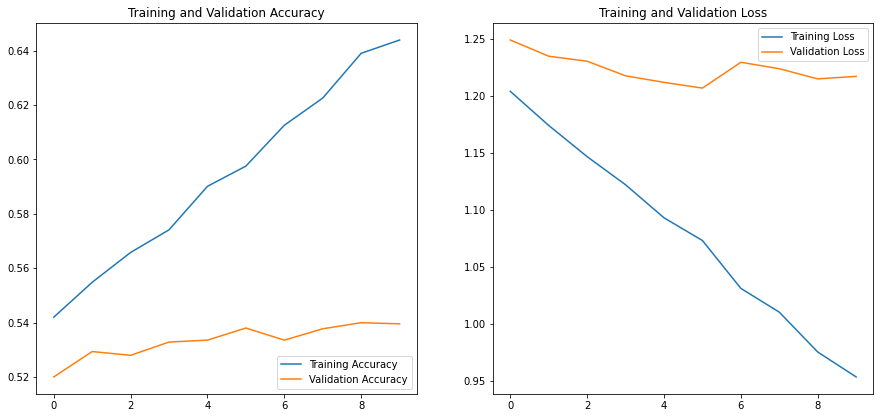

In [158]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [159]:
# best model prediction on test data
#del(model)
model = load_model('models/CNN_model')
prediction = model.predict(X_test) # for each datapoint, gives a (1,7) vector contains probabilities

225/225 [==============================] - 1s 6ms/step


In [160]:
Y_prediction = np.argmax(prediction,axis = 1) # get the index(label) of highest probability for each 
prediction_accuracy = np.mean(Y_prediction==Y_test)
print("The accuracy on test data is: ", prediction_accuracy)

The accuracy on test data is:  0.5380328782390638
